In [1]:
import netStandalone
from utils import AG_v1
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

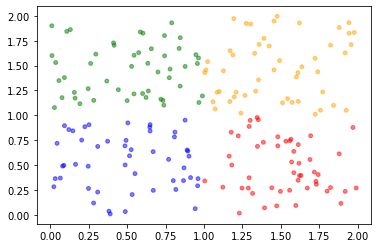

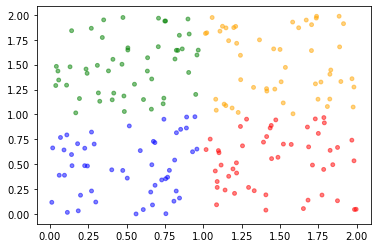

In [2]:
# np.random.seed(19680801)

COLOR_0 = 'blue'
COLOR_1 = 'red'
COLOR_2 = 'green'
COLOR_3 = 'orange'

N = 50
x = 4*[None]
y = 4*[None]
val_x = 4*[None]
val_y = 4*[None]
colors = 4*[None]
area = 15*np.ones(N)  # 0 to 15 point radii

x[0] = np.random.rand(N)
y[0] = np.random.rand(N)
val_x[0] = np.random.rand(N)
val_y[0] = np.random.rand(N)
colors[0] = COLOR_0

x[1] = np.random.rand(N) + 1 
y[1] = np.random.rand(N)
val_x[1] = np.random.rand(N) + 1 
val_y[1] = np.random.rand(N)
colors[1] = COLOR_1

x[2] = np.random.rand(N)
y[2] = np.random.rand(N) + 1 
val_x[2] = np.random.rand(N)
val_y[2] = np.random.rand(N) + 1 
colors[2] = COLOR_2

x[3] = np.random.rand(N) + 1
y[3] = np.random.rand(N) + 1
val_x[3] = np.random.rand(N) + 1
val_y[3] = np.random.rand(N) + 1
colors[3] = COLOR_3


plt.scatter(x[0], y[0], s=area, c=colors[0], alpha=0.5)
plt.scatter(x[1], y[1], s=area, c=colors[1], alpha=0.5)
plt.scatter(x[2], y[2], s=area, c=colors[2], alpha=0.5)
plt.scatter(x[3], y[3], s=area, c=colors[3], alpha=0.5)
plt.show()

plt.scatter(val_x[0], val_y[0], s=area, c=colors[0], alpha=0.5)
plt.scatter(val_x[1], val_y[1], s=area, c=colors[1], alpha=0.5)
plt.scatter(val_x[2], val_y[2], s=area, c=colors[2], alpha=0.5)
plt.scatter(val_x[3], val_y[3], s=area, c=colors[3], alpha=0.5)
plt.show()

In [3]:
pack_data_in = []
pack_rigth_outs = []
val_pack_data_in = []
val_pack_rigth_outs = []
for k in range(4):
    out = np.zeros(4)
    out[k] = 5
    for i in range(N):
        pack_data_in.append([x[k][i], y[k][i]])
        pack_rigth_outs.append(copy.deepcopy(out))
        val_pack_data_in.append([val_x[k][i], val_x[k][i]])
        val_pack_rigth_outs.append(copy.deepcopy(out))

my_ag = AG_v1.ag_handler(population_size = 150, n_ins =  2, n_outs = 4, net_imp = netStandalone.CPU)

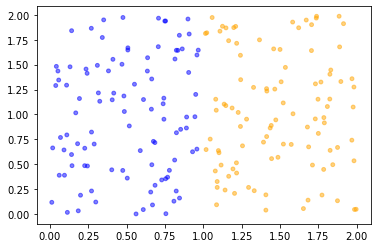

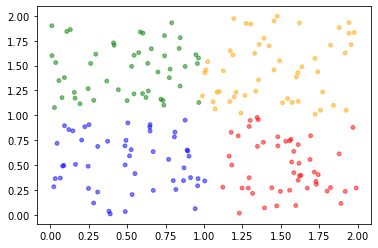

294.8339609205723

In [6]:
#Ordena y pinta el mejor

my_ag.screen(val_pack_data_in, val_pack_rigth_outs)
val_out = my_ag.exe_pack_best(val_pack_data_in)
val_color_out = []

for i in range(len(val_out)):
    aux = np.argsort(val_out[i])
    if aux[3] == 0:
        val_color_out.append(COLOR_0)
    if aux[3] == 1:
        val_color_out.append(COLOR_1)
    if aux[3] == 2:
        val_color_out.append(COLOR_2)
    if aux[3] == 3:
        val_color_out.append(COLOR_3)

v_x = np.concatenate((val_x[0],val_x[1],val_x[2],val_x[3]))
v_y = np.concatenate((val_y[0],val_y[1],val_y[2],val_y[3]))
plt.scatter(v_x, v_y, s=15, c=val_color_out, alpha=0.5)
plt.show()

my_ag.scores[my_ag.black_list[0]]

my_ag.screen(pack_data_in, pack_rigth_outs)
out = my_ag.exe_pack_best(pack_data_in)
color_out = []

for i in range(len(out)):
    aux = np.argsort(out[i])
    if aux[3] == 0:
        color_out.append(COLOR_0)
    if aux[3] == 1:
        color_out.append(COLOR_1)
    if aux[3] == 2:
        color_out.append(COLOR_2)
    if aux[3] == 3:
        color_out.append(COLOR_3)

p_x = np.concatenate((x[0],x[1],x[2],x[3]))
p_y = np.concatenate((y[0],y[1],y[2],y[3]))
plt.scatter(x, y, s=15, c=color_out, alpha=0.5)
plt.show()

my_ag.scores[my_ag.black_list[0]]

In [5]:
#Aprende
I = 10
best_perf = [my_ag.scores[my_ag.black_list[0]]]

for i in tqdm(range(I)):
    my_ag.learn(pack_data_in, pack_rigth_outs)
    my_ag.screen(pack_data_in, pack_rigth_outs)
    best_perf.append(my_ag.scores[my_ag.black_list[0]])

print(best_perf)

100%|██████████| 10/10 [00:47<00:00,  4.78s/it]

[1020.9435950182378, 567.3083692677319, 469.9947527786717, 446.27531362418085, 402.0621300577186, 378.74718319810927, 364.4902581064962, 350.15962964564096, 326.09115965571254, 310.63153169490397, 294.8339609205723]
